In [21]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

### Best Tags

Stack Exchange welcomes anything related to data science and analysis. The home page subdivides into tags, users and companies. Tags are keywords that when put in the question help other users know which topic your question refers to and helps them find questions related to certain topics. Users is self understood and companies are producing and/or manufacturing in the world of technology. To help choose a topic we can check which topic/s are most popular in the questions. Each post has number of votes, whether or not the poster accepted and answer, how many users viewed the post, any tags in the post are shown below the post and users can check other questions with that tag. It also has the users name and the time of posting.
The Post and Tags tables might be able to help us. Let's look into it further.

Perusing the table names, a few stand out as relevant for our goal:

* Posts
* PostTags
* Tags
* TagSynonyms

We ran some queries to get a feel of the tables;
* Queries to see the column names
* Found the highest scores
* checked types
* and more...

The query to get all posts from year 2019:
    SELECT Id,
       PostTypeId,
       CreationDate,
       Score,
      ViewCount, 
        Tags, 
       AnswerCount,
       FavoriteCount 
   FROM posts
  WHERE YEAR(CreationDate) = 2019 
       and PostTypeId = 1;

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
questions.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,1407.000000
mean,54724.172870,0.870687,171.548026,0.787985,1.184790
std,6507.618509,1.410255,772.813626,0.851146,0.982766
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,1.000000
50%,54833.000000,1.000000,40.000000,1.000000,1.000000
75%,60674.500000,1.000000,98.000000,1.000000,1.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


We see that only FavoriteCount has missing values. We can replace the missing values with zero.

The types seem right for every column.

We can split and clean the tags column and make it into a list.

In [6]:
questions['FavoriteCount'].fillna(0, inplace = True)

In [7]:
questions['FavoriteCount'].isnull().sum()

0

In [8]:
questions["Tags"] = questions["Tags"].str.replace('><', ',').str.replace('<', '').str.replace('>', '')
questions["Tags"] = questions["Tags"].str.split(',')

In [9]:
questions["Tags"]

0                         [machine-learning, data-mining]
1       [machine-learning, regression, linear-regressi...
2            [python, time-series, forecast, forecasting]
3                   [machine-learning, scikit-learn, pca]
4                [dataset, bigdata, data, speech-to-text]
5                                           [fuzzy-logic]
6       [time-series, anomaly-detection, online-learning]
7                                  [matrix-factorisation]
8                   [correlation, naive-bayes-classifier]
9       [machine-learning, python, deep-learning, kera...
10                                     [machine-learning]
11                             [machine-learning, theory]
12                   [machine-learning, gradient-descent]
13      [nlp, clustering, feature-extraction, encoding...
14                  [python, scikit-learn, pandas, numpy]
15      [python, scikit-learn, decision-trees, accurac...
16                                       [python, pandas]
17            

In [10]:
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [11]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [12]:
used_tags = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in used_tags:
            used_tags[tag] += 1
        else:
            used_tags[tag] = 1
                        

In [13]:
used_tags

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

In [26]:
df_used_tags = pd.DataFrame.from_dict(used_tags, orient = 'index')

In [28]:
most_used = df_used_tags.sort_values(by=0).tail(20)
most_used

,0
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


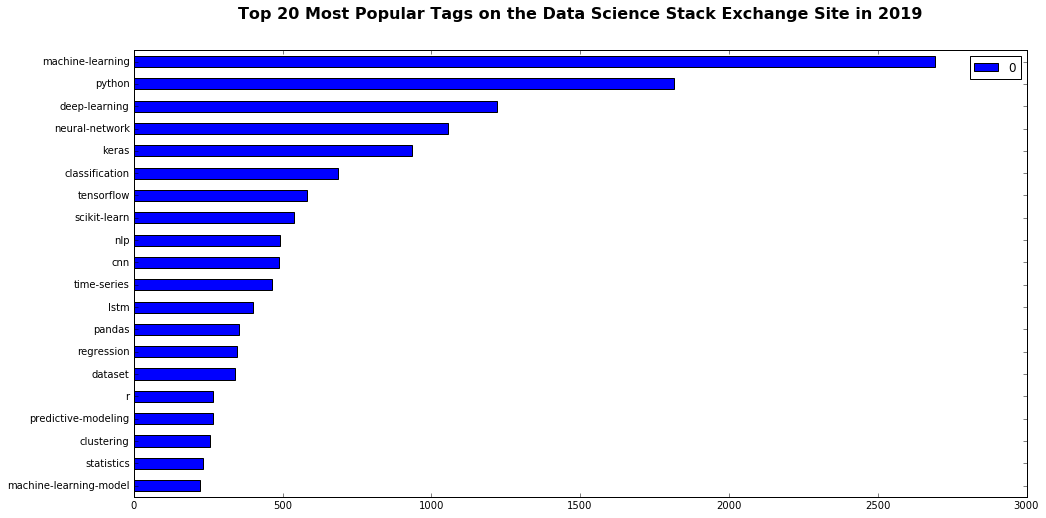

In [31]:
most_used.plot(kind="barh", figsize=(16,8))
plt.title("Top 20 Most Popular Tags on the Data Science Stack Exchange Site in 2019",
          y=1.06, fontsize=16, weight='bold')


In [ ]:
# Tried to make it work and it didn't run.

# viewed_tags = {}
# for tags in questions['Tags']:
#     for tag in tags:
#         if tag in used_tags:
#             count = questions['ViewCount'][questions['Tags'].str.contains(tag)]
#             used_tags[tag] += count
#         else:
#             used_tags[tag] = questions['ViewCount'][questions['Tags'].str.contains(tag)]

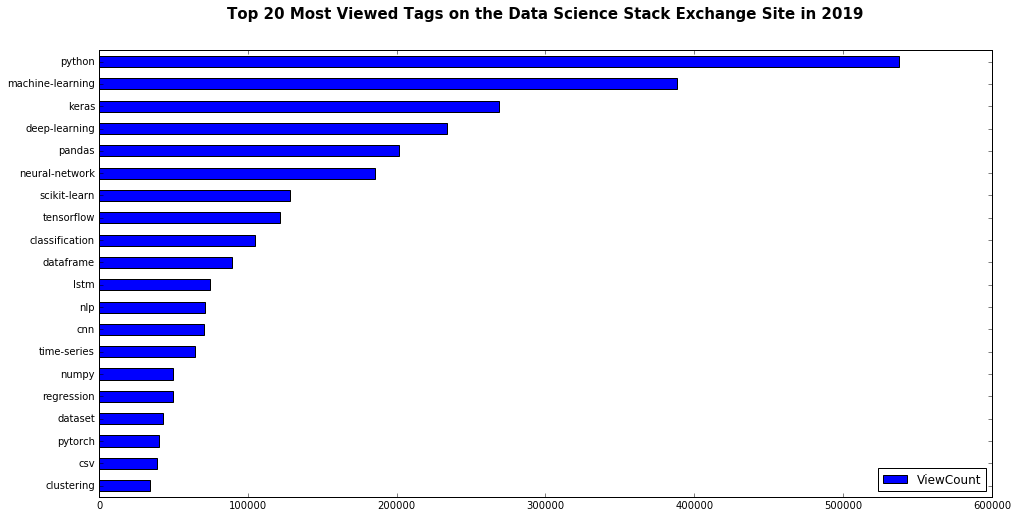

In [34]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))
plt.title("Top 20 Most Viewed Tags on the Data Science Stack Exchange Site in 2019",
          y=1.06, fontsize=15, weight='bold')